# Welcome to Data Exploration for the Hidden Keywords project

This is the data exploration associated with the the Hidden Keywords project, that can be found in my [GitHub](https://github.com/jshleap/HiddenKeywords)

In [91]:
import sys
import os
import dill
# Add the path to the package so some classes can be imported
sys.path.append('/Users/jshleap/Playground/Insight/HiddenKeywords/HiddenKeywords')
from scripts.gimmewords import *
from scripts.__dataforseo_credentials__ import *
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

For this exploration I will set the landing page to the [blog section of paperspace](https://blog.paperspace.com/tag/machine-learning/). I also ran the Google Keyword Planner tool on that landing page, and the results can be found in the [data folder](https://github.com/jshleap/HiddenKeywords/blob/master/data) of the github repo.

In [92]:
parent_folder = os.path.abspath(os.path.pardir)
mock_landing_page = "https://blog.paperspace.com/tag/machine-learning/" 
mock_GKP_result = os.path.join(parent_folder, 'data', 'Paperspace_KW_Stats_2019-09-23_at_14_37_49.csv')
max_results = 10 
depth = 3 
model = 'lda'

For testing purposes, I will set the maximum number of google searches to 10 and the maximum depth to 3. The former refers to the maximum number of related pages retrieved in a google search, having for query the landing page. The depth is the maximum recursion in the crawling of the link within each of the results.

Now I need to read the Google keyword planner (GKP) results. The encoding of this download varies, so I wrote a function that automatically detects such encoding, called `detect_encoding` (cryptic, I know!). Also, GKP file contains extra comments in the first two lines so we have to avoid them:

In [93]:
df_opt = dict(skiprows=[0, 1], encoding=detect_encoding(mock_GKP_result), sep='\t')
gkp = pd.read_csv(mock_GKP_result, **df_opt)
# print subset of columns and the first 10 entries
gkp.reindex(columns=['Keyword', 'Min search volume', 'Competition', 'Top of page bid (low range)', 'CPC']).head(10)

,Keyword,Min search volume,Competition,Top of page bid (low range),CPC
0,papersapce,100,Low,3.32,NaN
1,paperspace,"10,000",Low,3.97,NaN
2,paperspace ai,10,Low,NaN,NaN
3,paperspace deep learning,10,Low,2.53,NaN
4,paperspace machine,10,Low,7.44,NaN
5,paperspace virtual machine,10,Low,NaN,NaN
6,paperspace student,10,Low,NaN,NaN
7,paperspace machine learning,10,Medium,3.32,NaN
8,free cloud deep learning,10,Medium,2.67,NaN
9,paperspace free,10,Low,NaN,NaN


As you can see there is quite a bit of missing values. I implemented the `Data for SEO API` search to get the stats on the words that would be identified. Now we can run the Crawler and explore a bit its results:

In [94]:
pages = GetPages(mock_landing_page, max_results, depth)

Crawling the landing page
	Processing https://blog.paperspace.com/tag/machine-learning/
	Processing https://blog.paperspace.com/gradient-continuous-integration-github/
	Processing https://blog.paperspace.com/introducing-gradient-low-cost-instances/
Crawling Google results
	Processing https://blog.paperspace.com/tag/reinforcement-learning/	Processing https://blog.paperspace.com/tag/tutorial/
	Processing https://blog.paperspace.com/tag/gpu/

	Processing https://blog.paperspace.com/tag/onnx/
	Processing https://blog.paperspace.com/write-for-paperspace/
	Processing https://blog.paperspace.com/write-for-paperspace/
	Processing https://blog.paperspace.com/reproducible-data-with-pytorch-and-quilt/
	Processing https://blog.paperspace.com/pytorch-101-advanced/
	Processing https://blog.paperspace.com/tag/tutorial/
	Processing https://blog.paperspace.com/tag/tutorial/
	Processing https://blog.paperspace.com/pytorch-memory-multi-gpu-debugging/
	Processing https://blog.paperspace.com/running-tensor

In [95]:
print('Number of pages crawled', len(pages.pages))
print('Number of documents', len(pages.text))

Number of pages crawled 9
Number of documents 9


In [96]:
pages.pages

('https://blog.paperspace.com/tag/deep-learning/',
 'https://blog.paperspace.com/tag/tutorial/',
 'https://blog.paperspace.com/tag/onnx/',
 'https://blog.paperspace.com/tag/reinforcement-learning/',
 'https://blog.paperspace.com/tag/pytorch/',
 'https://blog.paperspace.com/tag/gpu/',
 'https://blog.paperspace.com/tag/ml/',
 'https://blog.paperspace.com/tag/getting-started/',
 'https://blog.paperspace.com/ci-cd-for-machine-learning-ai/')

In [97]:
#first few lines of the top10 content
for text in pages.text:
    print(text[:100])

tutorial pytorch part going deep pytorch hello readers post series pytorch post aimed pytorch users 
tutorial pytorch part going deep pytorch hello readers post series pytorch post aimed pytorch users 
tutorial pytorch part going deep pytorch hello readers post series pytorch post aimed pytorch users 
tutorial pytorch part going deep pytorch hello readers post series pytorch post aimed pytorch users 
tutorial pytorch part going deep pytorch hello readers post series pytorch post aimed pytorch users 
 announcement introducing gradient low cost instances public cloud built first foremost enable compa
 quilt reproducible machine learning pytorch quilt article train pytorch model perform super resolut
announcement multinode distributed training app today excited announce number powerful features impr
gradient introducing gradientci friendly ci cd bot machine learning ai pipelines update post date re


Once we have crawled over the landing page results, we can extract some keywords from this corpora. The class `IdentifyWords` will do this by NLP processing. First using PageRank text summarization strategy. This class will take at minimum the corpora (a.k.a pages.text), the documents of the landing page (a.k.a. pages.landing_page), the filename of the GKP result (a.k.a mock_GKP_result), and the minimum and maximum distance for frequency filtering:

In [98]:
iw = IdentifyWords(docs=pages.text, stats=mock_GKP_result, landing_doc=pages.landing_page, max_df=0.9, min_df=0.01, 
                   max_features=100, n_keywords=10, model=None)

Top 10 words in vocabulary
['earlier', 'module', 'functional', 'layers', 'torch', 'define', 'loss', 'hold', 'class', 'def']


In [99]:
print('Top 10 Corpus Keywords\n', iw.pre_keywords[0][:10])
print('Top 10 Landing page Keywords\n', iw.landing_kw[:10])
print('Top 10 GKP keywords\n', iw.gkp.Keyword.head(10))

Top 10 Corpus Keywords
 [('learned', 0.20702052546640382), ('gradients', 0.2027615431498683), ('images', 0.20064821355612833), ('models', 0.19502625823382896), ('modeling', 0.19502625823382896), ('learns generalize', 0.17303010458486107), ('learning functionality', 0.16732407329467644), ('training', 0.15638031604158903), ('trains', 0.15638031604158903), ('like', 0.14857923291966962)]
Top 10 Landing page Keywords
 [('learn', 0.2204258613226325), ('learned', 0.2204258613226325), ('gradient', 0.1865840868369753), ('gradients', 0.1865840868369753), ('imaging', 0.16719022936864097), ('learns generalize', 0.16428363959762812), ('function', 0.15204056965376417), ('functions', 0.15204056965376417), ('functionality', 0.15204056965376417), ('functioning', 0.15204056965376417)]
Top 10 GKP keywords
 0                     papersapce
1                     paperspace
2                  paperspace ai
3       paperspace deep learning
4             paperspace machine
5     paperspace virtual machine
6  

We have now a set of candidate words, let's get the stats of them using [Data for SEO](https://docs.dataforseo.com/) API. Though is a paid service, is easy to set up and use. However, it charges per query which have a maximum of 2500 words. For testing I am going to use at most 2500 combined.

In [100]:
landing_keywords = [x[0] for x in iw.landing_kw]
landing_pageRank = [x[1] for x in iw.landing_kw]
gkp_keywords = iw.gkp.Keyword.to_list()
total = len(set(landing_keywords)) + len(set(gkp_keywords))
rest = 2500 - total
inferred_keywords = [x[0] for y in iw.pre_keywords if y for x in y[:rest] for y in iw.pre_keywords if x]
print('Number of Inferred keywords', len(set(inferred_keywords)))
print('Number of landing keywords', len(set(landing_keywords)))
print('Number of GKP keywords', len(set(gkp_keywords)))
print('Top 10 inferred Keywords and PageRank value')
print(iw.pre_keywords[0][:10])
print('Bottom 10 inferred Keywords and PageRank value')
print(iw.pre_keywords[0][-10:])

Number of Inferred keywords 1811
Number of landing keywords 801
Number of GKP keywords 253
Top 10 inferred Keywords and PageRank value
[('learned', 0.20702052546640382), ('gradients', 0.2027615431498683), ('images', 0.20064821355612833), ('models', 0.19502625823382896), ('modeling', 0.19502625823382896), ('learns generalize', 0.17303010458486107), ('learning functionality', 0.16732407329467644), ('training', 0.15638031604158903), ('trains', 0.15638031604158903), ('like', 0.14857923291966962)]
Bottom 10 inferred Keywords and PageRank value
[('adapting', 0.016208439016536635), ('adapt', 0.016208439016536635), ('adaptive', 0.016208439016536635), ('fully', 0.016192083477239477), ('multiply', 0.01615167661628186), ('multiplying', 0.01615167661628186), ('multiplied', 0.01615167661628186), ('memory', 0.016134455126130633), ('security', 0.01612338135902817), ('dibas', 0.01607570827527565)]


In [101]:
landing_keywords, landing_pageRank = zip(*iw.landing_kw)
q = np.quantile(landing_pageRank, 0.25)
idx = [x > q for x in landing_pageRank]
landing_keywords = np.array(landing_keywords)[idx].tolist()
gkp_keywords = iw.gkp.Keyword.to_list()
inferred_keywords = [x[0] for y in iw.pre_keywords if y for x in y for y in iw.pre_keywords if x]
inferred_pagerank = [x[1] for y in iw.pre_keywords if y for x in y for y in iw.pre_keywords if x]
new_q= np.quantile(inferred_pagerank, 0.25)
inferred_idx = [x > new_q for x in inferred_pagerank]
inferred_keywords = np.array(inferred_keywords)[inferred_idx].tolist()
combined = list(set(landing_keywords + gkp_keywords + inferred_keywords))[:2500]
combined[:10]

['core benefits',
 'term',
 'understand',
 'known',
 'links',
 'research',
 'set',
 'inputs',
 'covered implement basic classifier earlier',
 'architecture']

Norm
KstestResult(statistic=0.19867600867519797, pvalue=3.4845122204590958e-28)
Lognorm
KstestResult(statistic=0.0655715871422885, pvalue=0.0019434051909551027)
Gamma
KstestResult(statistic=0.12060374975942256, pvalue=1.3064765807940511e-10)


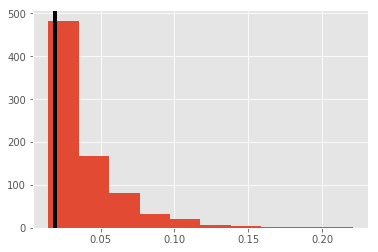

In [102]:
%matplotlib inline
from scipy.stats import gamma, kstest
from scipy import stats
import numpy as np
import statsmodels as sm

def test_distribution(x):
    q = np.quantile(x, 0.25)
    for distribution in ['norm', 'lognorm', 'gamma']:
        dist = getattr(stats, distribution)
        param = dist.fit(x)
        print(distribution.capitalize())
        print(kstest(x, distribution,  args=param))
    fig, ax = plt.subplots(1, 1)
    ax.hist(x, bins=10)
    ax.axvline(x=q, linewidth=4, color='k')
    plt.show()

test_distribution(landing_pageRank)

Norm
KstestResult(statistic=0.1919665134098426, pvalue=0.0)
Lognorm
KstestResult(statistic=0.015221898195025174, pvalue=7.43556789580592e-10)
Gamma
KstestResult(statistic=0.05225832437864353, pvalue=1.4475506164663875e-111)


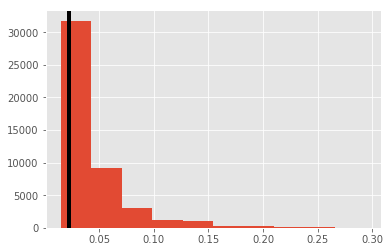

In [103]:
test_distribution(inferred_pagerank)

In [110]:
# stats where pre-run (credentials issue)
df = pd.read_csv('df_checkpoint.csv')
df.head()

,Keyword,ad_position_average,ad_position_max,ad_position_min,bid,cpc_average,cpc_max,cpc_min,daily_clicks_average,daily_clicks_max,...,daily_cost_average,daily_cost_max,daily_cost_min,daily_impressions_average,daily_impressions_max,daily_impressions_min,key,language,loc_id,match
0,obtaining,NaN,NaN,NaN,100,NaN,NaN,NaN,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,obtaining,en,2124,exact
1,features,1.35,1.21,1.48,100,2.56,2.81,2.3,0.08,0.09,...,0.22,0.24,0.19,1.2,1.33,1.08,features,en,2124,exact
2,neural,NaN,NaN,NaN,100,NaN,NaN,NaN,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,neural,en,2124,exact
3,announcing,NaN,NaN,NaN,100,NaN,NaN,NaN,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,announcing,en,2124,exact
4,processes,NaN,NaN,NaN,100,NaN,NaN,NaN,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,processes,en,2124,exact


In [111]:
df.shape

(2500, 21)

In [ ]:
bag_of_keywords = set(x[0] for y in iw.pre_keywords for x in y)
keywords_not_gkp = bag_of_keywords.difference(x[0] for x in iw.landing_kw)
print(len(keywords_not_gkp))
print(list(keywords_not_gkp)[:10])

In [ ]:
iw = IdentifyWords(text, mock_GKP_result, land, max_df=0.9, min_df=0.01,
                 max_features=100, n_keywords=10, model='word2vec')


In [ ]:
w2v = iw.word2vec()

In [ ]:
w2v.most_similar(positive='methods optimizations ')


In [ ]:
w2v.build_vocab(new, update=True)

In [ ]:
w2v.train(new, total_examples=w2v.corpus_count, epochs=w2v.epochs)

In [ ]:
text

In [ ]:
iw = IdentifyWords(text, mock_GKP_result, land, max_df=0.9, min_df=0.01, max_features=100, n_keywords=10, 
                   model='lda')
dictionary, corpus, lda = iw.lda()

In [ ]:
# select and article at random from train_df
random_article_index = np.random.randint(len(text))
bow = dictionary.doc2bow(text[random_article_index])
# get the topic contributions for the document chosen at random above
doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=bow)])
# print the top 5 contributing topics and their words
for i in doc_distribution.argsort()[-5:][::-1]:
    print(i, lda.show_topic(topicid=i, topn=10), "\n")
new_bow = dictionary.doc2bow(land)
new_doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=new_bow)])
# print the top 8 contributing topics and their words
for i in new_doc_distribution.argsort()[-5:][::-1]:
    print(i, lda.show_topic(topicid=i, topn=10), "\n")
# we need to use nested list comprehension here
# this may take 1-2 minutes...
doc_topic_dist = np.array([[tup[1] for tup in lst] for lst in lda[corpus]])
doc_topic_dist.shape

In [ ]:
iw.keywords

In [ ]:
def jensen_shannon(query, matrix):
    """
    https://www.kaggle.com/ktattan/lda-and-document-similarity
    This function implements a Jensen-Shannon similarity
    between the input query (an LDA topic distribution for a document)
    and the entire corpus of topic distributions.
    It returns an array of length M where M is the number of documents in the corpus
    """
    # lets keep with the p,q notation above
    p = query[None,:].T # take transpose
    q = matrix.T # transpose matrix
    m = 0.5*(p + q)
    return np.sqrt(0.5*(entropy(p,m) + entropy(q,m)))


k=10
query, matrix = new_doc_distribution, doc_topic_dist
sims = jensen_shannon(query,matrix) # list of jensen shannon distances
k_top sims.argsort()[:k] 


In [9]:
df = pd.read_csv('/Users/jshleap/Playground/Insight/HiddenKeywords/df_checkpoint.csv', index_col=0)
df

,ad_position_average,ad_position_max,ad_position_min,bid,cpc_average,cpc_max,cpc_min,daily_clicks_average,daily_clicks_max,daily_clicks_min,daily_cost_average,daily_cost_max,daily_cost_min,daily_impressions_average,daily_impressions_max,daily_impressions_min,key,language,loc_id,match
architecture training,1.06,1.00,1.11,100,15.86,17.45,14.27,0.02,0.02,0.02,0.31,0.34,0.28,0.44,0.49,0.40,architecture training,en,2124,exact
enable,1.06,1.00,1.11,100,4.47,4.91,4.02,0.03,0.04,0.03,0.15,0.17,0.14,0.89,0.98,0.80,enable,en,2124,exact
operations,1.06,1.00,1.11,100,15.79,17.37,14.21,0.14,0.16,0.13,2.27,2.50,2.05,4.15,4.56,3.73,operations,en,2124,exact
hyphens,NaN,NaN,NaN,100,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,hyphens,en,2124,exact
generating,NaN,NaN,NaN,100,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,generating,en,2124,exact
exciting,NaN,NaN,NaN,100,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,exciting,en,2124,exact
captured,NaN,NaN,NaN,100,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,captured,en,2124,exact
define,1.06,1.00,1.11,100,7.73,8.50,6.96,0.02,0.02,0.02,0.14,0.16,0.13,0.44,0.49,0.40,define,en,2124,exact
cells,1.06,1.00,1.11,100,3.94,4.33,3.54,0.02,0.02,0.02,0.08,0.08,0.07,0.44,0.49,0.40,cells,en,2124,exact
refers,NaN,NaN,NaN,100,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,refers,en,2124,exact


In [ ]:
%matplotlib inline
df.plot(kind='scatter', x='daily_cost_average', y='cpc_average')

In [ ]:
df.plot(kind='scatter', x='ad_position_average', y='cpc_average')

In [ ]:
df.plot(kind='scatter', x='daily_impressions_average', y='cpc_average')

In [ ]:
df.plot(kind='scatter', x='daily_impressions_average', y='daily_clicks_average')

In [ ]:
df['kw_value'] = (df.daily_impressions_average + df.daily_clicks_average) * (1/df.daily_cost_average)
df

In [ ]:
df.plot(kind='scatter', x='daily_impressions_average', y='kw_value')

In [14]:
import os, sys
path = os.path.abspath(os.path.pardir)
sys.path.append(path)

In [22]:
from scripts.knapsack import *
print(df.shape)
df = df.dropna()
print(df.shape)
values = (df.daily_impressions_average + df.daily_clicks_average) * \
          (1/df.daily_cost_average)
ks = Knapsack(items_names=df.index.to_list(), values=values.to_list(),
              weights=df.daily_cost_average.to_list(), capacity=20,
              solve_type=5, name='Branch_n_bound')
ks.get_results()


(778, 20)
(778, 20)


TypeError: Expecting a list of tuples

In [23]:
items_names=df.index.to_list()[:50]
values=values.to_list()[:50]
weights=df.daily_cost_average.to_list()[:50]
print(items_names)
print(values)
print(weights)
print(ks.capacity)
print(ks.values[:50])
print(len(ks.packed_items))
print(sum(ks.packed_weights))
df[df.index.isin(ks.packed_items[:10])]

['architecture training', 'enable', 'operations', 'define', 'cells', 'host', 'market', 'cases', 'custom', 'end', 'benchmark', 'action', 'update', 'format', 'platforms', 'basic', 'aims', 'transfer', 'international', 'project', 'square', 'latest', 'pytorch', 'multiplying', 'current', 'benchmarking', 'installation', 'environment', 'organization', 'parts', 'optimization', 'announcement', 'theory', 'accessing', 'short', 'debugging', 'bit', 'reached', 'benefits', 'stages', 'annealing', 'demonstration', 'downloaded', 'areas', 'reliable', 'worlds', 'rdp', 'setting', 'detector', 'cpus']
[1.4838709677419357, 6.133333333333334, 1.8898678414096917, 3.2857142857142856, 5.75, 1.54406580493537, 1.400705052878966, 1.676190476190476, 2.0055555555555555, 0.36860068259385664, 1.67849985685657, 2.325, 2.530487804878049, 1.9827737739497275, 1.8709677419354842, 3.0000000000000004, 3.833333333333334, 4.3125, 2.615, 1.4348837209302328, 0.8444171183831894, 9.842105263157896, 1.4974332648870634, 1.6111111111111

,ad_position_average,ad_position_max,ad_position_min,bid,cpc_average,cpc_max,cpc_min,daily_clicks_average,daily_clicks_max,daily_clicks_min,daily_cost_average,daily_cost_max,daily_cost_min,daily_impressions_average,daily_impressions_max,daily_impressions_min,key,language,loc_id,match


In [24]:
'/Users/jshleap/Playground/Insight/HiddenKeywords/data/Paperspace_KW_Stats_2019-09-23_at_14_37_49.csv'

'/Users/jshleap/Playground/Insight/HiddenKeywords/data/Paperspace_KW_Stats_2019-09-23_at_14_37_49.csv'

In [25]:
df = pd.read_csv('/Users/jshleap/Playground/Insight/HiddenKeywords/data/Paperspace_KW_Stats_2019-09-23_at_14_37_49.csv', sep='\t')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [30]:
df['daily_cost_average'].describe()


count     778.000000
mean       69.652018
std       473.461246
min         0.010000
25%         0.360000
50%         1.670000
75%         9.830000
max      7340.020000
Name: daily_cost_average, dtype: float64

In [ ]:
from os.path import dirname, join

import pandas as pd

from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource, CustomJS
from bokeh.models.widgets import Slider, Button, DataTable, TableColumn, NumberFormatter
from bokeh.io import curdoc, output_notebook, show

output_notebook()
current = df
source = ColumnDataSource(data=dict())
source.data = {
    'ad_position_average': current.ad_position_average,
    'cpc_average': current.cpc_average,
    'daily_clicks_average': current.daily_clicks_average,
    'daily_cost_average': current.daily_cost_average,
    'daily_impressions_average': current.daily_impressions_average,
}
columns = [
    TableColumn(field="ad_position_average", title="Ad Position"),
    TableColumn(field="cpc_average", title="Cost per Click (CPC)",
                formatter=NumberFormatter(format="$0,0.00")),
    TableColumn(field="daily_clicks_average", title="Daily Clicks"),
    TableColumn(field="daily_cost_average", title="Daily Cost",
                formatter=NumberFormatter(format="$0,0.00")),
    TableColumn(field="daily_impressions_average", title="Daily Impressions")
]
def update():
    current = df[(df['daily_cost_average'] >= slider.value)].dropna()
    source.data = {
        'ad_position_average': current.ad_position_average,
        'cpc_average': current.cpc_average,
        'daily_clicks_average': current.daily_clicks_average,
        'daily_cost_average': current.daily_cost_average,
        'daily_impressions_average': current.daily_impressions_average,
    }
minimum = min(df['daily_cost_average'])
maximum = max(df['daily_cost_average'])
data_table = DataTable(source=source, columns=columns, width=800)
slider.on_change('value', lambda attr, old, new: update())
slider = Slider(title="Daily Budget", start=minimum, end=maximum, value=minimum, step=0.1)
controls = column(slider)
curdoc().add_root(row(controls, data_table))
curdoc().title = "Export CSV"
show(column(slider, data_table))
update()


Loading BokehJS ...